<a href="https://colab.research.google.com/github/kundajelab/adar_editing/blob/master/xgboost_with_shap/XGBOOST_WITH_TREESHAP-AJUBA-by_Xin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install numpy==1.15

  Using cached https://files.pythonhosted.org/packages/88/29/f4c845648ed23264e986cdc5fbab5f8eace1be5e62144ef69ccc7189461d/numpy-1.15.0-cp36-cp36m-manylinux1_x86_64.whl


In [ ]:
!pip install shap
!pip install --upgrade xgboost
!pip install cufflinks

In [ ]:
# Fix the issue of using "plotnine"
!pip install statsmodels -U
!pip install plotnine

In [ ]:
import shutil
import os

# shutil.rmtree(os.path.join(os.getcwd(), "adar_editing"))
!git clone https://github.com/kundajelab/adar_editing

In [ ]:
import os
os.chdir("adar_editing/xgboost_with_shap/")

In [1]:
%reload_ext autoreload
%load_ext autoreload
%autoreload 2   

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))


In [3]:
#helper utilities for model training and interpretation 
import shap
from helpers import * 

#set a random seed so code is reproducible 
random.seed(1234)

# load JS visualization code to notebook
shap.initjs()
import warnings
warnings.filterwarnings('ignore')

#visualization utilities 
import matplotlib
import matplotlib.pyplot as plt 
%matplotlib inline
import plotly.plotly as py
import numpy as np
from plotly.offline import iplot
from plotly.graph_objs import Heatmap

import feature_subsets
import xgboost



## AJUBA xgboost with TreeShap <a name='outline'>
<ol>
    <li><a href=#1>Computational Dataset</a></li>
    <li><a href=#2>Computational Dataset Feature Subsets</a></li>
    <li><a href=#3>Exclude mut features</a></li>
 </ol>


## AJUBA Computational features <a name='1'>
<a href=#outline>Home</a>

In [4]:
data=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)

In [5]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]
np.unique(np.sort(data['mut_pos']))

# np.histogram(data['mut_pos'], bins=np.unique(np.sort(data['mut_pos'])))

array([64., 65., 66., 67., 68., 69., 70., 71., 72., 73., 75., 76., 77.,
       78., 79., 80., 81., 82., 83., 84., nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan])

In [6]:
data=format_for_xgboost(data)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(482, 186)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 22, 84.0: 22, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 10}


In [7]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [8]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [9]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
print("\n".join(to_drop))

u1_5prm_cp_internal
site_1_1:A:U
site_3prm_cp_bulge:G:U
u1_3prm_cp_bulge:U:A
site_prev_nt:U
u3_3prm_cp_bulge:U:A
u1_length_internal_es
site_length_hairpin
d3_3prm_cp_bulge
d1_3prm_cp_bulge:G:U
u3_5prm_cp_bulge:G:C
mut_ref_nt:C
site_next_struct:I
mut_ref_nt:A
d1_struct:I
d1_3prm_cp_internal:G:C
site_3prm_cp_internal:C:G
d2_5prm_cp_bulge
d2_exist
d3_exist
d1_5prm_cp_hairpin
d1_exist
mut_prev_struct:H
d1_5prm_cp_internal:G:C
site_prev_nt:A
d1_struct:B
u1_5prm_cp_bulge:U:A
site_5prm_cp_hairpin
u2_length_internal_es
d3_length_hairpin
d1_length_internal_es
site_next_struct:B
d2_3prm_cp_bulge
d1_length_internal_ecs
d3_5prm_cp_bulge
d1_5prm_cp_bulge:C:G
site_5prm_cp_bulge:A:U
u3_length_internal_es
u1_length_hairpin
d3_5prm_cp_hairpin
site_prev_struct:I
u2_3prm_cp_internal
d2_length_bulge
site_next_nt:A
site_3prm_cp_bulge:A:U
u2_exist
u3_5prm_cp_internal
u3_5prm_cp_bulge:C:G
u1_exist
d1_5prm_cp_internal:A:U
mut_ref_nt:G
u2_length_internal_ecs
u2_5prm_cp_internal
u3_3prm_cp_internal
d2_length_ha

In [10]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [11]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [12]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(326, 108)
(326,)
(77, 108)
(77,)
(99, 108)
(99,)


In [13]:
## format matrixes for xgboost 
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [14]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [15]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [16]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-auc:0.73592	eval-mae:0.313874	eval-map:1	eval-aucpr:0.177686	eval-rmse:0.320233	train-auc:0.712131	train-mae:0.324572	train-map:1	train-aucpr:0.145792	train-rmse:0.327418
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-auc:0.741769	eval-mae:0.220937	eval-map:1	eval-aucpr:0.192647	eval-rmse:0.225745	train-auc:0.716127	train-mae:0.228143	train-map:1	train-aucpr:0.156135	train-rmse:0.230645
[2]	eval-auc:0.755979	eval-mae:0.155874	eval-map:1	eval-aucpr:0.216098	eval-rmse:0.159657	train-auc:0.717773	train-mae:0.160586	train-map:1	train-aucpr:0.159191	train-rmse:0.162954
[3]	eval-auc:0.759666	eval-mae:0.109962	eval-map:1	eval-aucpr:0.233033	eval-rmse:0.113706	train-auc:0.718117	train-mae:0.113048	train-map:1	train-aucpr:0.160842	train-rmse:0.11551
[4]	eval-auc:0.774802	eval-mae:0.079195	eval-map:1	eval-aucpr:0.235899	eval-rmse:0.083686	train-auc:0.760208	train-mae:0.080096	train

[45]	eval-auc:0.800439	eval-mae:0.012183	eval-map:1	eval-aucpr:0.22942	eval-rmse:0.037743	train-auc:0.813237	train-mae:0.001234	train-map:1	train-aucpr:0.18378	train-rmse:0.001896
[46]	eval-auc:0.800692	eval-mae:0.012141	eval-map:1	eval-aucpr:0.229495	eval-rmse:0.037736	train-auc:0.813258	train-mae:0.001201	train-map:1	train-aucpr:0.183783	train-rmse:0.001862
[47]	eval-auc:0.800681	eval-mae:0.012117	eval-map:1	eval-aucpr:0.229495	eval-rmse:0.03772	train-auc:0.813272	train-mae:0.001168	train-map:1	train-aucpr:0.183785	train-rmse:0.001833
[48]	eval-auc:0.80058	eval-mae:0.012122	eval-map:1	eval-aucpr:0.229384	eval-rmse:0.037752	train-auc:0.813277	train-mae:0.00114	train-map:1	train-aucpr:0.183794	train-rmse:0.001788
[49]	eval-auc:0.80085	eval-mae:0.012128	eval-map:1	eval-aucpr:0.229422	eval-rmse:0.037797	train-auc:0.813314	train-mae:0.001069	train-map:1	train-aucpr:0.183799	train-rmse:0.001635
[50]	eval-auc:0.800861	eval-mae:0.012108	eval-map:1	eval-aucpr:0.229435	eval-rmse:0.037792	train

In [17]:
# save to binary file for faster loading
bst.save_model('ajuba.computational.model')
# save model to text file 
bst.dump_model('ajuba.computational.raw.txt')


In [18]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [19]:
## Get performance metrics on full dataset 
from helpers import * 
print_aggregate_peformance_metrics(train_y,train_pred,
                                   eval_y,eval_pred,
                                   test_y,test_pred,
                                   positive_thresh_train=0.2,
                                   positive_thresh_eval=0.2,
                                   positive_thresh_test=0.2)

Train
	Spearman corr : SpearmanrResult(correlation=0.9973183250526062, pvalue=0.0)
	Pearson corr : (0.9997240912607316, 0.0)
	MAE : 0.0008858562543190772
	MAPE : 0.027827126761357165
	RMSE : 0.001354961983059545
	auPRC : 0.9999999999999999
	auROC : 1.0
Eval
	Spearman corr : SpearmanrResult(correlation=0.8701734197138166, pvalue=9.295474295034637e-25)
	Pearson corr : (0.9044946114625205, 1.7705020062601634e-29)
	MAE : 0.012219672659579671
	MAPE : 0.17412213408563898
	RMSE : 0.037815612887636636
	auPRC : 0.9484126984126984
	auROC : 0.9953051643192489
Test
	Spearman corr : SpearmanrResult(correlation=0.9035724016591085, pvalue=1.7513480129160607e-37)
	Pearson corr : (0.8797470759935682, 4.3678276771207825e-33)
	MAE : 0.012844194988474219
	MAPE : 0.22991942032937804
	RMSE : 0.03357611311409105
	auPRC : 0.6971250971250971
	auROC : 0.9695340501792115


In [20]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9973183250526062, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8701734197138166, pvalue=9.295474295034637e-25)
Test:SpearmanrResult(correlation=0.9035724016591085, pvalue=1.7513480129160607e-37)


Pearson correlation:
Train:(0.9997240912607316, 0.0)
Eval:(0.9044946114625205, 1.7705020062601634e-29)
Test:(0.8797470759935682, 4.3678276771207825e-33)


In [21]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0008858562543190772
MAE Eval:0.012219672659579671
MAE Test:0.012844194988474219


In [22]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:2.7827126761357164%
MAPE Eval:17.412213408563897%
MAPE Test:22.991942032937803%


In [23]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.001354961983059545
RMSE Eval:0.037815612887636636
RMSE Test:0.03357611311409105


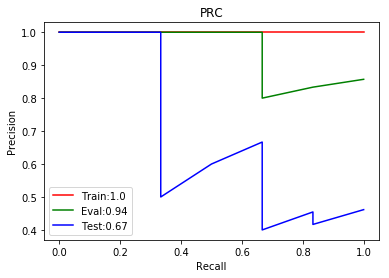

In [24]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.5 are labeled as "0". 
## Editing levels >= 0.5 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.2,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.2,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

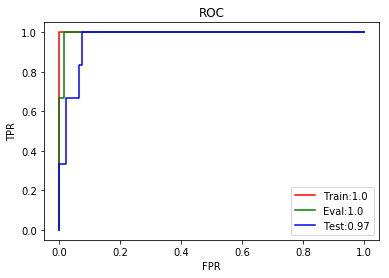

In [25]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.2,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.2,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.2,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.2,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

In [1]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, AJUBA Degenerate")
plt.ylabel("Predicted train set editing level, AJUBA Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, AJUBA Degenerate")
plt.ylabel("Predicted eval set editing level, AJUBA Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Degenerate")
plt.ylabel("Predicted test set editing level, AJUBA Degenerate")

plt.show()

NameError: name 'matplotlib' is not defined

In [27]:
import plotnine
from plotnine import *
test_df=pd.DataFrame({'Observed':test_y,
                     'Predicted':test_pred,
                     'Dataset':'AJUBA'})

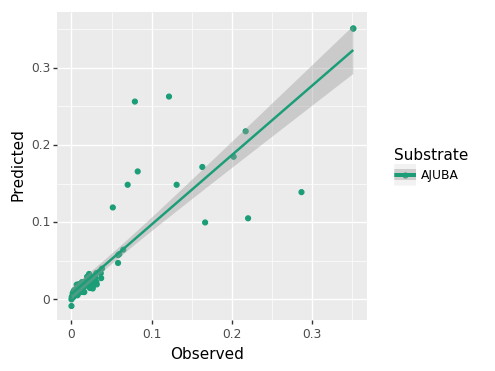

<ggplot: (8778964089678)>


/home/anna/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 4 x 4 in image.

/home/anna/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: AJUBA.comp.substrate.svg



In [28]:
plotnine.options.figure_size = (4, 4)

p=(ggplot(test_df, aes('Observed', 'Predicted', color='factor(Dataset)'))
 + geom_point()
 + stat_smooth(method='lm')
 + scale_color_manual(values=['#1b9e77'],name="Substrate"))
print(p)
ggsave(plot=p, filename='AJUBA.comp.substrate.svg',width=4,height=4,units='in')


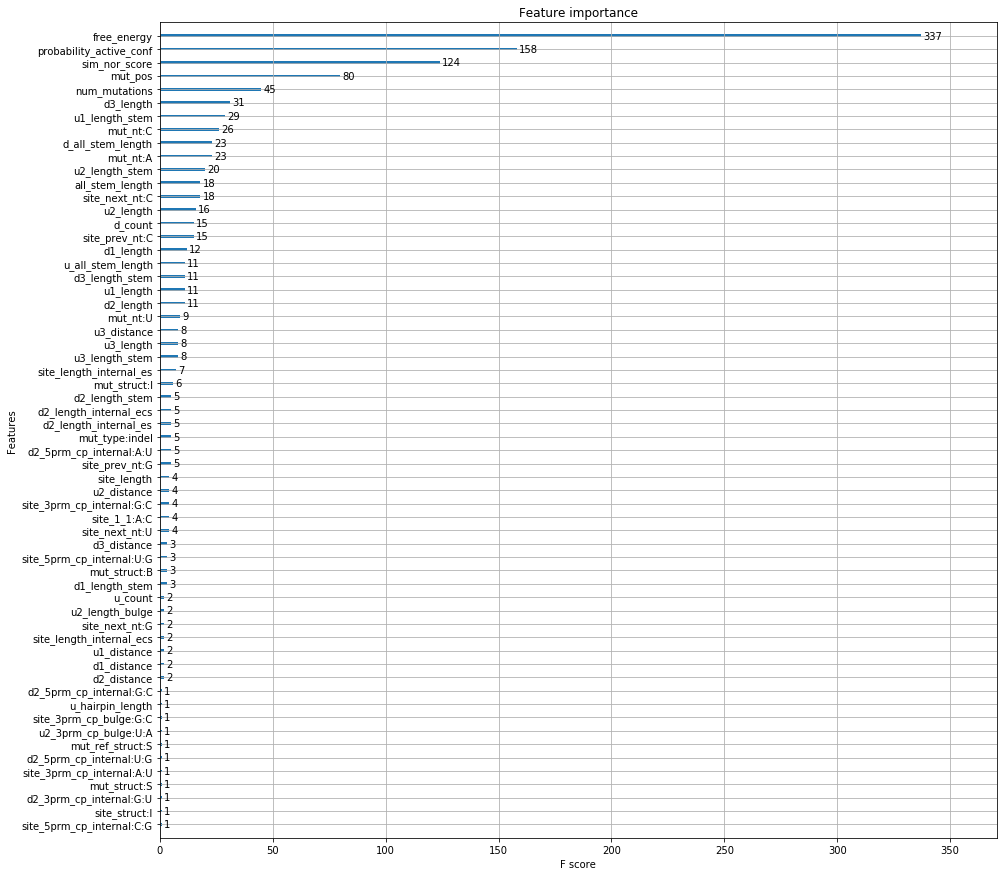

In [29]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

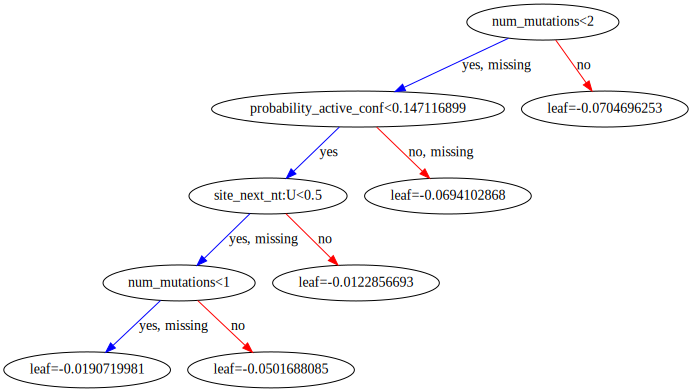

In [32]:
xgboost.to_graphviz(bst, num_trees=2)

In [33]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(99, 108)

In [34]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [35]:
print(max(test_y['editing_value']))
print(test_pred[max_row])

0.35100000000000003
0.3508333


In [36]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [37]:
print(min(test_y['editing_value']))
print(test_pred[min_row])

0.0
2.3543835e-06


In [38]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

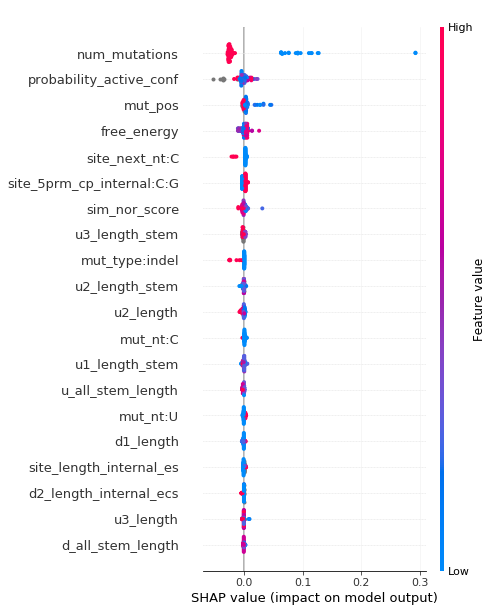

In [39]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X, show=False)
plt.gca().set_facecolor('white')
plt.gca().set_axisbelow(True)
plt.gca().grid(linestyle='-', linewidth='0.5', color='#eeeeee')

plt.gcf().set_size_inches(5, 10)
plt.savefig("AJUBA.comp.shap.svg", format='svg',width=30, height=10, dpi=300, bbox_inches="tight")

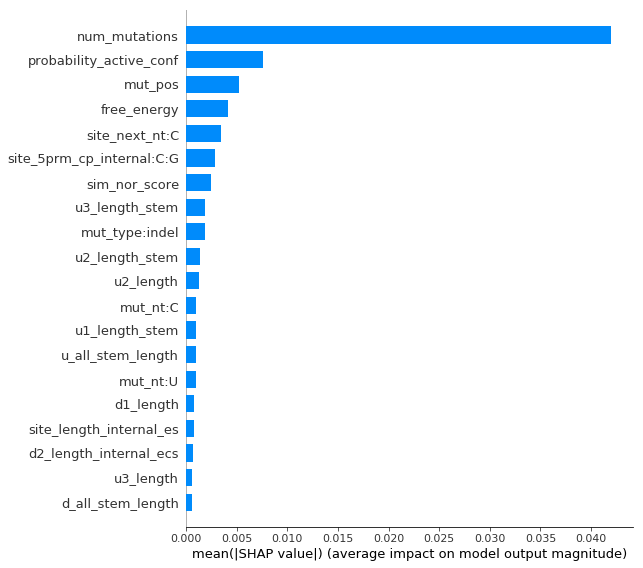

In [40]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [41]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(99, 108, 108)

In [42]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [43]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [44]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)


## Computational Dataset: Feature Subsets<a name='2'>
<a href=#outline>Home</a>

In [45]:
shap_values=pd.DataFrame(shap_values,columns=Cols)

['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*']


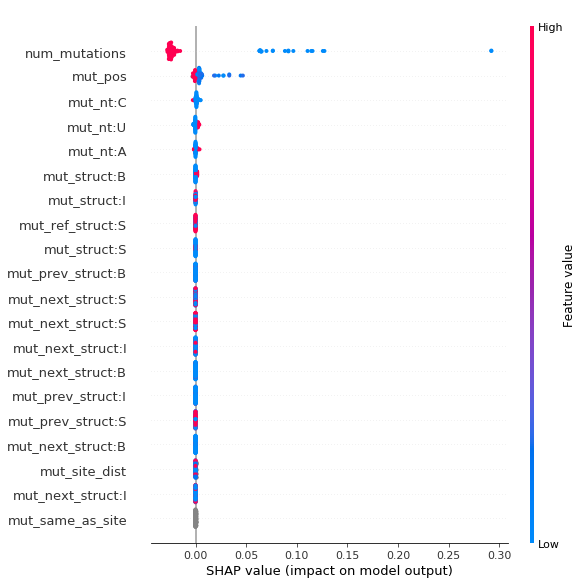

Contribution/Total:0.5682063
['site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


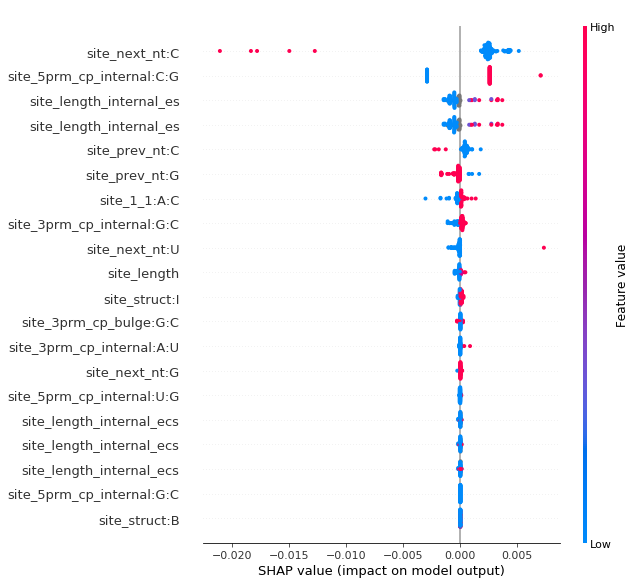

Contribution/Total:0.11077758
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*']


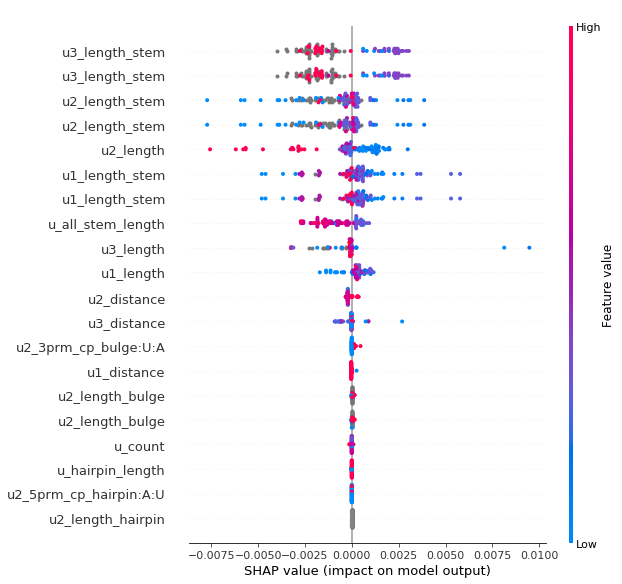

Contribution/Total:0.13943511
['d_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_struct*', 'd2_length*', 'd2_length_stem*', 'd2_length_hairpin*', 'd2_length_bulge*', 'd2_length_internal_es*', 'd2_length_internal_ecs*', 'd2_5prm_cp_hairpin*', 'd2_5prm_cp_bulge*', 'd2_3prm_cp_bulge*', 'd2_5prm_cp_internal*', 'd2_3prm_cp_internal*', 'd3_exist*', 'd3_distance*', 'd3_struct*', 'd3_length*', 'd3_length_stem*', 'd3_length_hairpin*', 'd3_length_bulge*', 'd3_length_internal_es*', 'd3_length_internal_ecs*', 'd3_5prm_cp_hairpin*', 'd3_5prm_cp_bulge*', 'd3_3prm_cp_bulge*', 'd3_5prm_cp_internal*', 'd3_3prm_cp_internal*']


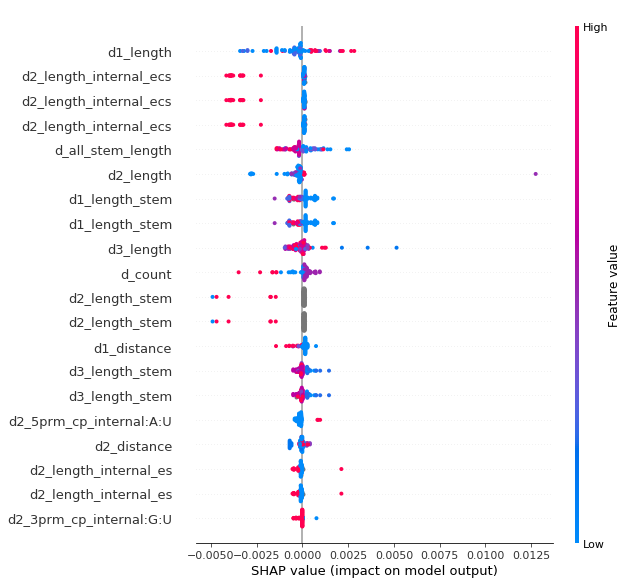

Contribution/Total:0.082620084
['u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_cp_hairpin*', 'u2_5prm_cp_bulge*', 'u2_3prm_cp_bulge*', 'u2_5prm_cp_internal*', 'u2_3prm_cp_internal*', 'u3_exist*', 'u3_distance*', 'u3_struct*', 'u3_length*', 'u3_length_stem*', 'u3_length_hairpin*', 'u3_length_bulge*', 'u3_length_internal_es*', 'u3_length_internal_ecs*', 'u3_5prm_cp_hairpin*', 'u3_5prm_cp_bulge*', 'u3_3prm_cp_bulge*', 'u3_5prm_cp_internal*', 'u3_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*'

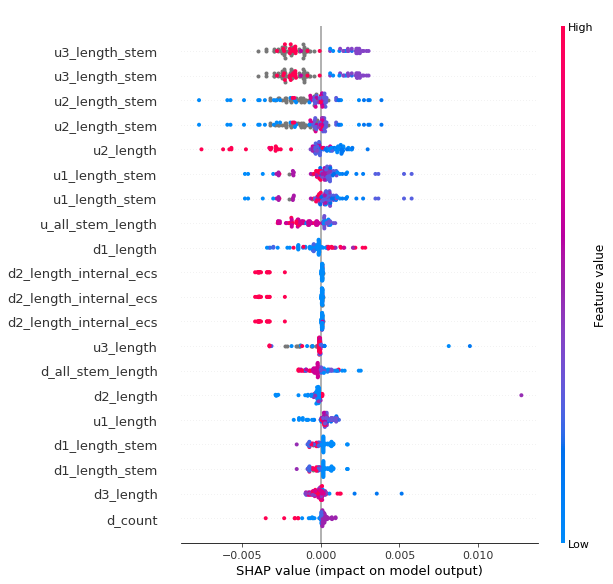

Contribution/Total:0.2220552
['num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


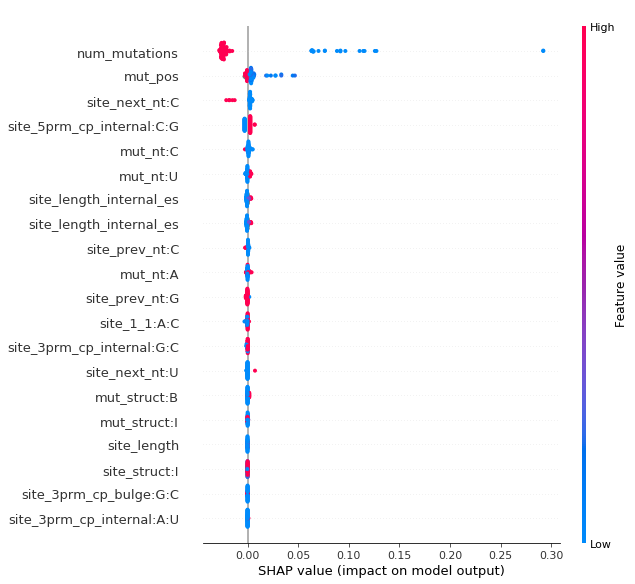

Contribution/Total:0.6789839
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'd_count*', 'd_all_stem_length*', 'd1_exist*', 'd1_distance*', 'd1_struct*', 'd1_length*', 'd1_length_stem*', 'd1_length_hairpin*', 'd1_length_bulge*', 'd1_length_internal_es*', 'd1_length_internal_ecs*', 'd1_5prm_cp_hairpin*', 'd1_5prm_cp_bulge*', 'd1_3prm_cp_bulge*', 'd1_5prm_cp_internal*', 'd1_3prm_cp_internal*', 'd2_exist*', 'd2_distance*', 'd2_s

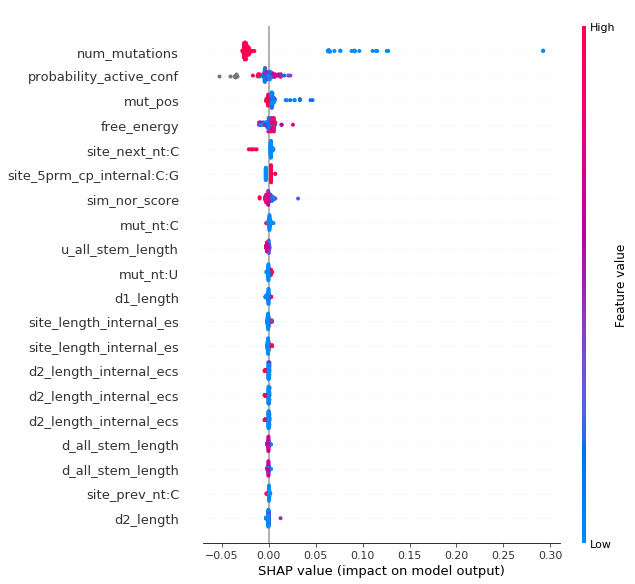

Contribution/Total:0.94106364
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'num_mutations*', 'mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'mut_struct*', 'mut_ref_struct*', 'mut_prev_struct*', 'mut_next_struct*', 'mut_same_as_site*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*',

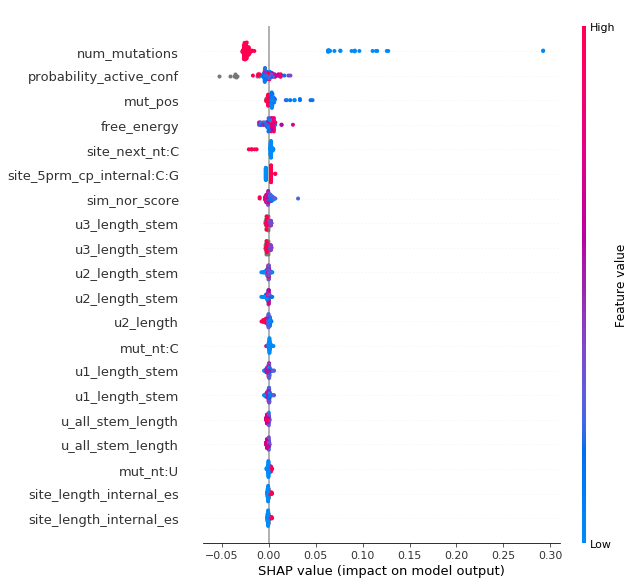

Contribution/Total:0.99787855
['site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*']


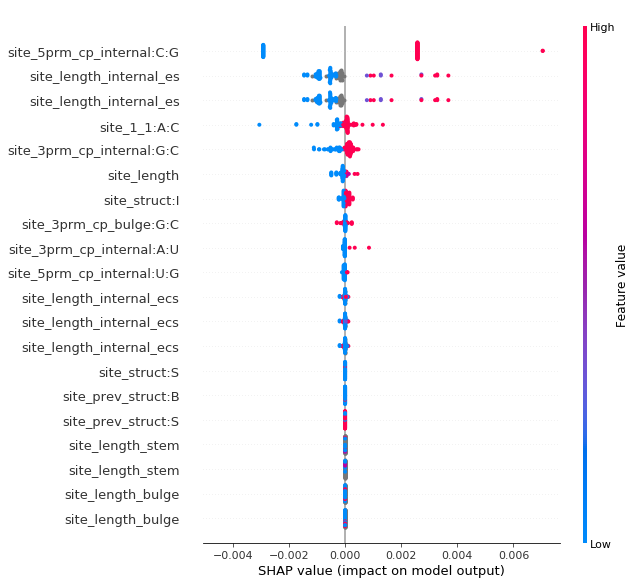

Contribution/Total:0.058766704
['site_prev_nt*', 'site_next_nt*']


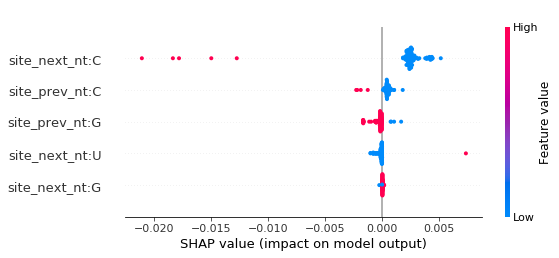

Contribution/Total:0.05201088
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*']


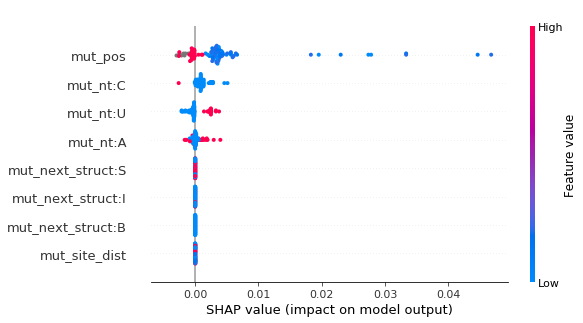

Contribution/Total:0.086256295
['mut_pos*', 'mut_site_dist*', 'mut_ref_nt*', 'mut_nt*', 'site_prev_nt*', 'site_next_nt*']


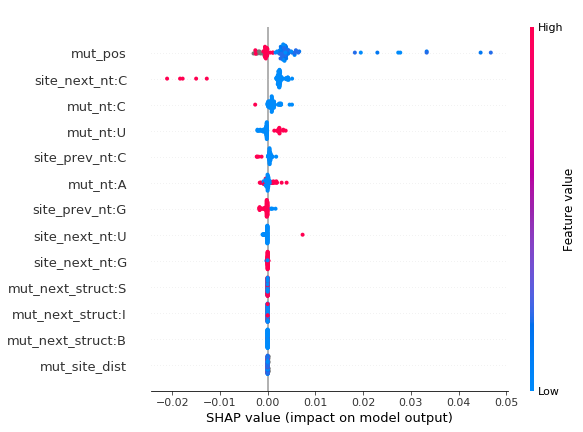

Contribution/Total:0.13826716
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*', 'site_prev_nt*', 'site_next_nt*', 'site_struct*', 'site_prev_struct*', 'site_next_struct*', 'site_1_1*', 'site_length*', 'site_length_stem*', 'site_length_hairpin*', 'site_length_bulge*', 'site_length_internal_es*', 'site_length_internal_ecs*', 'site_5prm_cp_hairpin*', 'site_5prm_cp_bulge*', 'site_3prm_cp_bulge*', 'site_5prm_cp_internal*', 'site_3prm_cp_internal*', 'u_count*', 'u_all_stem_length*', 'u_hairpin_length*', 'u1_exist*', 'u1_distance*', 'u1_struct*', 'u1_length*', 'u1_length_stem*', 'u1_length_hairpin*', 'u1_length_bulge*', 'u1_length_internal_es*', 'u1_length_internal_ecs*', 'u1_5prm_cp_hairpin*', 'u1_5prm_cp_bulge*', 'u1_3prm_cp_bulge*', 'u1_5prm_cp_internal*', 'u1_3prm_cp_internal*', 'u2_exist*', 'u2_distance*', 'u2_struct*', 'u2_length*', 'u2_length_stem*', 'u2_length_hairpin*', 'u2_length_bulge*', 'u2_length_internal_es*', 'u2_length_internal_ecs*', 'u2_5prm_c

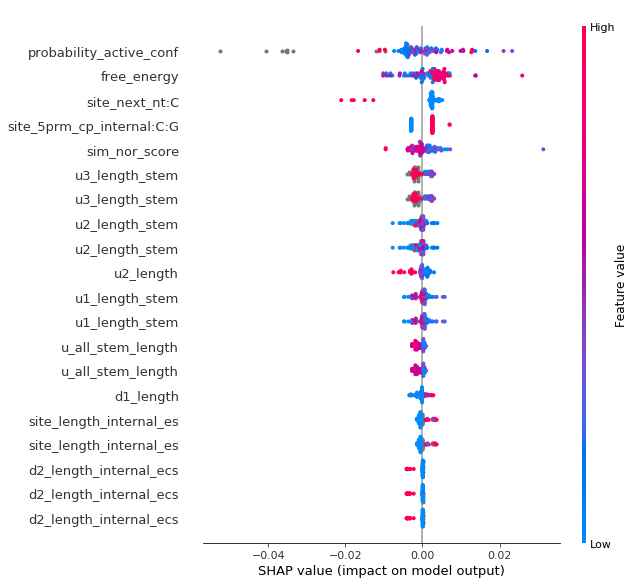

Contribution/Total:0.5122923
['all_stem_length', 'free_energy*', 'sim_nor_score*', 'probability_active_conf*']


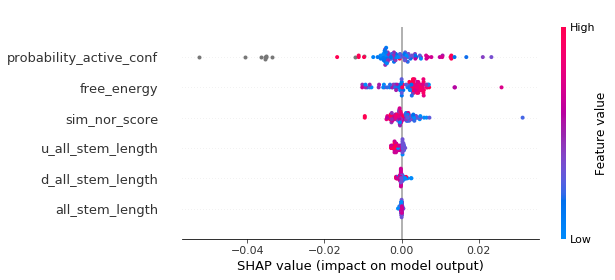

Contribution/Total:0.17945957


In [49]:
from feature_subsets import * 
subset_names=["mut","site","u","d","u_d","mut_site","no_up","no_down","site_struct","site_seq","mut_seq","mut_seq_site","no_mut","overall_structure"]
subset_contribs=[]
for subset in [mut,site,u,d,u_d,mut_site,no_up,no_down,site_struct,site_seq,mut_seq,mut_seq_site,no_mut,overall_structure]: 
  print(subset)
  cur_features=filter_features(shap_values,subset)
  cur_feature_shap=shap_values[cur_features].values 
  cur_feature_data_X=test_X[cur_features]
  shap.summary_plot(cur_feature_shap, cur_feature_data_X)#,sort=False,max_display=50)
  contrib=shap_contribs_subgroup(shap_values,subset)
  subset_contribs.append(contrib)
  print("Contribution/Total:"+str(contrib))

In [50]:
subset_contrib_df=pd.DataFrame({'Subset':subset_names,
                               'Contribution':[100*i for i in subset_contribs]})

In [51]:
subset_contrib_df=subset_contrib_df.sort_values(by=['Contribution'],ascending=False)
subset_contrib_df.reset_index(inplace=True, drop=True) 

In [52]:
from pandas.api.types import CategoricalDtype

In [53]:
subset_cat = CategoricalDtype(categories=list(subset_contrib_df['Subset']), ordered=True)

# Cast the existing categories into the new category. Due to a bug in pandas
# we need to do this via a string.
subset_contrib_df['Subset_Cat'] = subset_contrib_df['Subset'].astype(str).astype(subset_cat)

In [54]:
subset_contrib_df
subset_contrib_df.to_csv('AJUBA.comp.subset.importance.csv')

/home/anna/.local/lib/python3.6/site-packages/plotnine/ggplot.py:706: UserWarning:

Saving 5 x 4 in image.

/home/anna/.local/lib/python3.6/site-packages/plotnine/ggplot.py:707: UserWarning:

Filename: AJUBA.comp.subset.importance.svg



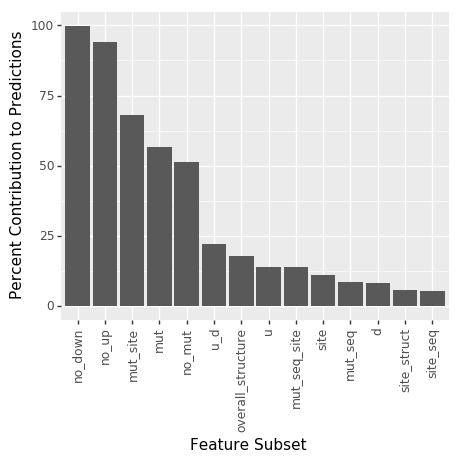

<ggplot: (-9223363257890938294)>

In [55]:
p=(ggplot(subset_contrib_df, aes('Subset_Cat', 'Contribution'))
 + geom_bar(stat='identity')
 + xlab("Feature Subset")
 + ylab("Percent Contribution to Predictions")
 + theme(axis_text_x=element_text(angle=90))
)
ggsave(plot=p, filename='AJUBA.comp.subset.importance.svg',width=5,height=4,units='in')
p

## No "mut" features <a name='3'>
<a href=#outline>Home</a>    

In [56]:
## Read in the data 
import pandas as pd 
data=pd.read_csv("../xin_feature_matrices/ajuba_bc_computational.features.csv",header=0,sep=',',index_col=0)
#drop all mut features
cur_features=filter_features(data,feature_subsets.mut)
cur_features.remove('mut_pos')
data=data.drop(cur_features,axis=1)
data.head


<bound method NDFrame.head of               editing_value  free_energy  sim_nor_score  \
rna_id                                                    
AJUBA_BC_000       0.351000       -70.57         1.0000   
AJUBA_BC_001       0.281000       -69.67         0.9023   
AJUBA_BC_002       0.205000       -67.58         0.9911   
AJUBA_BC_003       0.099000       -67.71         1.0000   
AJUBA_BC_004       0.074500       -67.57         1.0000   
AJUBA_BC_005       0.091500       -67.67         1.0000   
AJUBA_BC_006       0.351000       -70.57         1.0000   
AJUBA_BC_007       0.144500       -68.45         0.9754   
AJUBA_BC_008       0.148500       -69.86         0.9897   
AJUBA_BC_009       0.154500       -67.25         0.9211   
AJUBA_BC_010       0.216000       -67.50         0.9211   
AJUBA_BC_011       0.290000       -67.45         0.9934   
AJUBA_BC_012       0.121000       -66.96         0.9672   
AJUBA_BC_013       0.104000       -68.37         1.0000   
AJUBA_BC_014       0.06150

In [57]:
#remove any null editing level values 
data=data[~data["editing_value"].isnull().values]

In [58]:
data=format_for_xgboost(data)
train_split,eval_split,test_split=split_train_test_eval_by_mut_pos(data)

(482, 163)
{64.0: 22, 65.0: 21, 66.0: 22, 67.0: 22, 68.0: 22, 69.0: 23, 70.0: 23, 71.0: 24, 72.0: 23, 73.0: 33, 75.0: 33, 76.0: 24, 77.0: 24, 78.0: 23, 79.0: 23, 80.0: 22, 81.0: 22, 82.0: 22, 83.0: 22, 84.0: 22, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 0, nan: 10}


In [59]:
#Remove any non-varying features 
train_novar=get_singleval_features(train_split)
eval_novar=get_singleval_features(eval_split)
test_novar=get_singleval_features(test_split)
uniform_features_to_drop=list(set(train_novar+eval_novar+test_novar))

In [60]:
#Remove any null features 
train_null=get_all_null_features(train_split)
eval_null=get_all_null_features(eval_split)
test_null=get_all_null_features(test_split)
null_features_to_drop=list(set(train_null+eval_null+test_null))

In [61]:
to_drop=list(set(uniform_features_to_drop+null_features_to_drop))
to_drop.append("mut_pos")
print("\n".join(to_drop))

u1_5prm_cp_internal
site_1_1:A:U
site_3prm_cp_bulge:G:U
u1_3prm_cp_bulge:U:A
u3_3prm_cp_bulge:U:A
site_prev_nt:U
u1_length_internal_es
site_length_hairpin
u3_length_bulge
d3_3prm_cp_bulge
d1_3prm_cp_bulge:G:U
u3_5prm_cp_bulge:G:C
site_next_struct:I
d3_struct:I
d1_struct:I
d1_3prm_cp_internal:G:C
site_3prm_cp_internal:C:G
d2_5prm_cp_bulge
d2_exist
d3_exist
d1_5prm_cp_hairpin
d1_exist
d1_5prm_cp_internal:G:C
d1_struct:B
site_prev_nt:A
u1_5prm_cp_bulge:U:A
site_5prm_cp_hairpin
u2_length_internal_es
d3_length_hairpin
d1_length_internal_es
site_next_struct:B
u3_struct:B
d2_struct:I
d2_3prm_cp_bulge
d1_length_internal_ecs
d3_5prm_cp_bulge
d3_struct:S
d1_5prm_cp_bulge:C:G
site_5prm_cp_bulge:A:U
u3_length_internal_es
u1_length_hairpin
d3_5prm_cp_hairpin
site_5prm_cp_internal:G:C
d3_length_internal_es
u2_3prm_cp_internal
d2_length_bulge
site_next_nt:A
site_3prm_cp_bulge:A:U
u2_exist
u3_5prm_cp_internal
u3_5prm_cp_bulge:C:G
d3_3prm_cp_internal:G:U
u1_exist
d1_5prm_cp_internal:A:U
u2_length_inter

In [62]:
train_split=train_split.drop(to_drop,axis=1)
eval_split=eval_split.drop(to_drop,axis=1)
test_split=test_split.drop(to_drop,axis=1)

In [63]:
train_y=train_split['editing_value']
train_X=train_split.drop(['editing_value'],axis=1)

eval_y=eval_split['editing_value']
eval_X=eval_split.drop(['editing_value'],axis=1)

test_y=test_split['editing_value']
test_X=test_split.drop(['editing_value'],axis=1)

In [64]:
print(train_X.shape)
print(train_y.shape)
print(eval_X.shape)
print(eval_y.shape)
print(test_X.shape)
print(test_y.shape)


(316, 81)
(316,)
(88, 81)
(88,)
(98, 81)
(98,)


In [65]:
## format matrixes for xgboost 
dtrain=xgboost.DMatrix(train_X,train_y)
deval=xgboost.DMatrix(eval_X,eval_y)
dtest=xgboost.DMatrix(test_X,test_y)

In [66]:
## set model training parameters 
param=dict() 
param['nthread'] = 20
#rmse -- root mean square error 
# mae -- mean absolute error 
# map -- mean average precision 
# auc -- area under ROC curve 
# aucpr -- area under precision recall curve 
param['eval_metric'] = ['auc','mae','map','aucpr','rmse']

In [67]:
evallist = [(deval, 'eval'), (dtrain, 'train')]


In [68]:
num_round = 1000
bst = xgboost.train(param, dtrain, num_round, evallist,early_stopping_rounds=10)

[0]	eval-auc:0.594285	eval-mae:0.324629	eval-map:1	eval-aucpr:0.119303	eval-rmse:0.330259	train-auc:0.527021	train-mae:0.323866	train-map:1	train-aucpr:0.064028	train-rmse:0.32814
Multiple eval metrics have been passed: 'train-rmse' will be used for early stopping.

Will train until train-rmse hasn't improved in 10 rounds.
[1]	eval-auc:0.676356	eval-mae:0.22982	eval-map:1	eval-aucpr:0.157407	eval-rmse:0.235848	train-auc:0.582782	train-mae:0.227515	train-map:1	train-aucpr:0.088884	train-rmse:0.232594
[2]	eval-auc:0.725588	eval-mae:0.163736	eval-map:1	eval-aucpr:0.164219	eval-rmse:0.167911	train-auc:0.680656	train-mae:0.161208	train-map:1	train-aucpr:0.136718	train-rmse:0.165142
[3]	eval-auc:0.763163	eval-mae:0.118653	eval-map:1	eval-aucpr:0.180618	eval-rmse:0.122052	train-auc:0.684865	train-mae:0.114959	train-map:1	train-aucpr:0.143366	train-rmse:0.118246
[4]	eval-auc:0.778006	eval-mae:0.087873	eval-map:1	eval-aucpr:0.185862	eval-rmse:0.090744	train-auc:0.740318	train-mae:0.082681	train

[45]	eval-auc:0.828264	eval-mae:0.013593	eval-map:1	eval-aucpr:0.20065	eval-rmse:0.03781	train-auc:0.81101	train-mae:0.001524	train-map:1	train-aucpr:0.181785	train-rmse:0.002569
[46]	eval-auc:0.828364	eval-mae:0.01358	eval-map:1	eval-aucpr:0.200675	eval-rmse:0.037794	train-auc:0.811047	train-mae:0.001444	train-map:1	train-aucpr:0.181729	train-rmse:0.002467
[47]	eval-auc:0.828532	eval-mae:0.013522	eval-map:1	eval-aucpr:0.200683	eval-rmse:0.037737	train-auc:0.811085	train-mae:0.001369	train-map:1	train-aucpr:0.181735	train-rmse:0.002355
[48]	eval-auc:0.828862	eval-mae:0.01346	eval-map:1	eval-aucpr:0.200747	eval-rmse:0.037766	train-auc:0.811125	train-mae:0.001303	train-map:1	train-aucpr:0.181746	train-rmse:0.002274
[49]	eval-auc:0.829051	eval-mae:0.013421	eval-map:1	eval-aucpr:0.201076	eval-rmse:0.037713	train-auc:0.811144	train-mae:0.001249	train-map:1	train-aucpr:0.181787	train-rmse:0.002203
[50]	eval-auc:0.828887	eval-mae:0.013454	eval-map:1	eval-aucpr:0.201041	eval-rmse:0.037855	trai

In [69]:
# save to binary file for faster loading
bst.save_model('AJUBA.computational.model')
# save model to text file 
bst.dump_model('AJUBA.computational.raw.txt')


In [70]:
## get model predictions on the test, training, and eval splits 
test_pred = bst.predict(dtest)
train_pred=bst.predict(dtrain)
eval_pred=bst.predict(deval)

In [71]:
## Correlation values 
from scipy.stats import spearmanr,pearsonr
spearman_train=spearmanr(train_y,train_pred)
spearman_eval=spearmanr(eval_y,eval_pred)
spearman_test=spearmanr(test_y,test_pred)

pearson_train=pearsonr(train_y,train_pred)
pearson_eval=pearsonr(eval_y,eval_pred)
pearson_test=pearsonr(test_y,test_pred)

print("Spearman correlation:")
print("Train:"+str(spearman_train))
print("Eval:"+str(spearman_eval))
print("Test:"+str(spearman_test))
print("\n")
print("Pearson correlation:")
print("Train:"+str(pearson_train))
print("Eval:"+str(pearson_eval))
print("Test:"+str(pearson_test))

Spearman correlation:
Train:SpearmanrResult(correlation=0.9979962033452425, pvalue=0.0)
Eval:SpearmanrResult(correlation=0.8745029056876064, pvalue=9.236610692129652e-29)
Test:SpearmanrResult(correlation=0.9080665511774132, pvalue=4.6327346703043327e-38)


Pearson correlation:
Train:(0.9996152135128139, 0.0)
Eval:(0.8473517123900374, 2.31117354601628e-25)
Test:(0.8475004829937848, 3.739015423147737e-28)


In [72]:
## MAE
from sklearn.metrics import mean_absolute_error
mae_train=mean_absolute_error(train_y,train_pred)
print("MAE Train:"+str(mae_train))

mae_eval=mean_absolute_error(eval_y,eval_pred)
print("MAE Eval:"+str(mae_eval))

mae_test=mean_absolute_error(test_y,test_pred)
print("MAE Test:"+str(mae_test))


MAE Train:0.0009404605826685666
MAE Eval:0.013324889869021445
MAE Test:0.013674093815832799


In [73]:
## MAPE
pseudocount=0.01
mape_train=np.mean(np.abs((train_y - train_pred) /(pseudocount+train_y))) * 100
print("MAPE Train:"+str(mape_train)+"%")

mape_eval=np.mean(np.abs((eval_y - eval_pred) /(pseudocount+eval_y))) * 100
print("MAPE Eval:"+str(mape_eval)+"%")

mape_test=np.mean(np.abs((test_y - test_pred) /(pseudocount+test_y))) * 100
print("MAPE Test:"+str(mape_test)+"%")

MAPE Train:2.5249375407513295%
MAPE Eval:18.377180218693713%
MAPE Test:15.49280583921446%


In [74]:
## RMSE
from sklearn.metrics import mean_squared_error
import math 
rmse_train=math.sqrt(mean_squared_error(train_y,train_pred))
print("RMSE Train:"+str(rmse_train))

rmse_eval=math.sqrt(mean_squared_error(eval_y,eval_pred))
print("RMSE Eval:"+str(rmse_eval))

rmse_test=math.sqrt(mean_squared_error(test_y,test_pred))
print("RMSE Test:"+str(rmse_test))


RMSE Train:0.0016437091303165674
RMSE Eval:0.03797289472616006
RMSE Test:0.0423582319101853


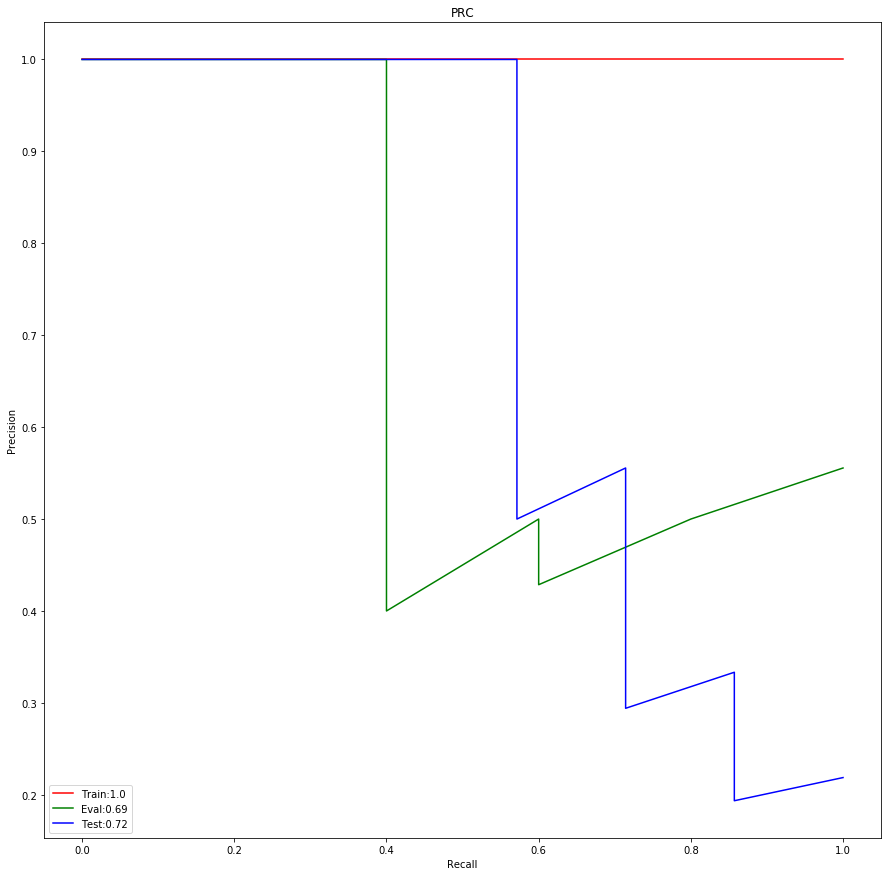

In [75]:
## PRC 
## PRC only valid for binary outcomes. 
## Editing levels < 0.2 are labeled as "0". 
## Editing levels >= 0.2 are labeled as "1". 

from sklearn.metrics import auc, precision_recall_curve

precision_train,recall_train,prc_thresholds_train=precision_recall_curve(train_y>=0.2,train_pred)
precision_eval,recall_eval,prc_thresholds_eval=precision_recall_curve(eval_y>=0.2,eval_pred)
precision_test,recall_test,prc_thresholds_test=precision_recall_curve(test_y>=0.2,test_pred)

auprc_train=auc(recall_train,precision_train)
auprc_eval=auc(recall_eval,precision_eval)
auprc_test=auc(recall_test,precision_test)

plt.plot(recall_train,precision_train,'r',label="Train:"+str(round(auprc_train,2)))
plt.plot(recall_eval,precision_eval,'g',label="Eval:"+str(round(auprc_eval,2)))
plt.plot(recall_test,precision_test,'b',label="Test:"+str(round(auprc_test,2)))
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("PRC")
plt.legend()

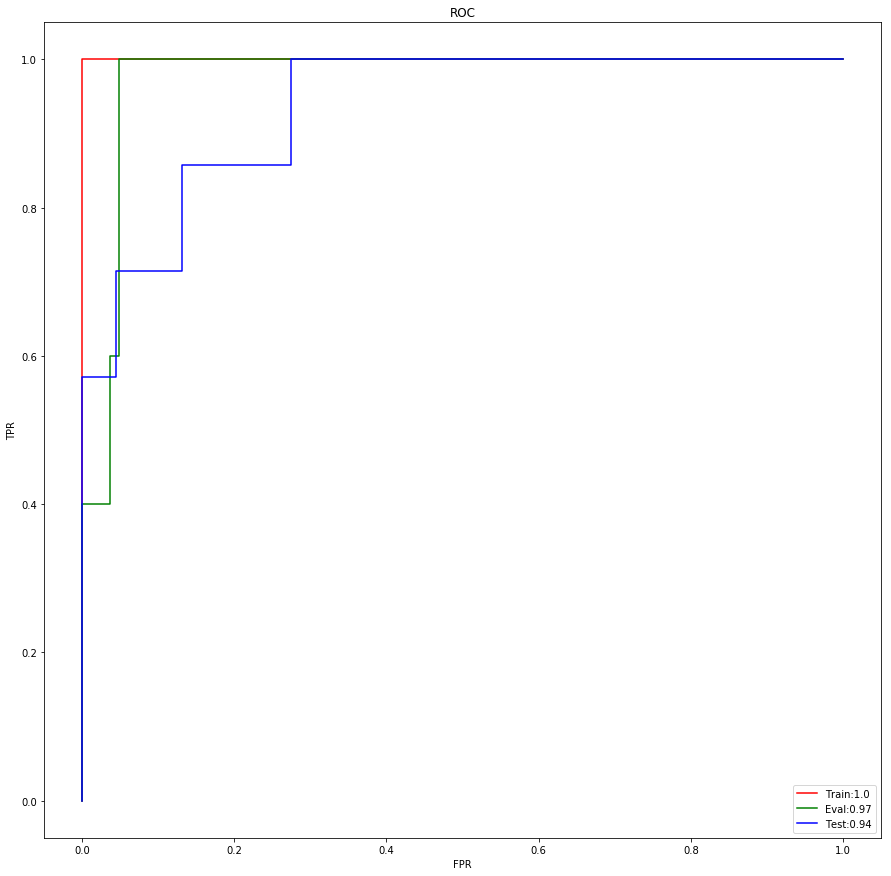

In [76]:
## ROC
from sklearn.metrics import roc_curve, roc_auc_score
fpr_train,tpr_train,roc_thresholds_train=roc_curve(train_y>=0.2,train_pred)
fpr_eval,tpr_eval,roc_thresholds_eval=roc_curve(eval_y>=0.2,eval_pred)
fpr_test,tpr_test,roc_thresholds_test=roc_curve(test_y>=0.2,test_pred)

auroc_train=roc_auc_score(train_y>=0.2,train_pred)
auroc_eval=roc_auc_score(eval_y>=0.2,eval_pred)
auroc_test=roc_auc_score(test_y>=0.2,test_pred)

plt.plot(fpr_train,tpr_train,'r',label="Train:"+str(round(auroc_train,2)))
plt.plot(fpr_eval,tpr_eval,'g',label="Eval:"+str(round(auroc_eval,2)))
plt.plot(fpr_test,tpr_test,'b',label="Test:"+str(round(auroc_test,2)))
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC")
plt.legend()

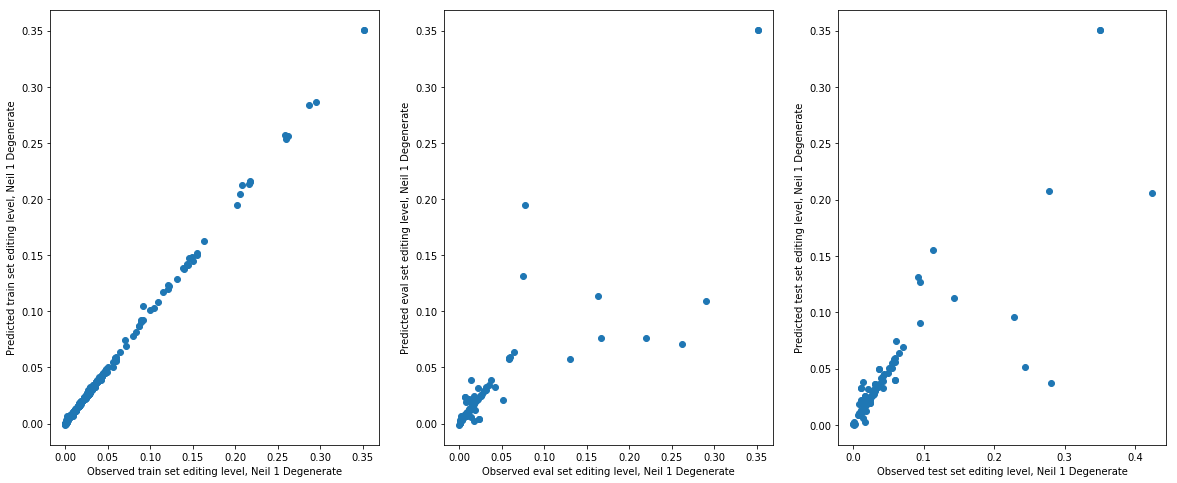

In [77]:
#plot the test set predictions 
matplotlib.rcParams['figure.figsize'] = [20, 8]
plt.subplot(1,3,1)
plt.plot(list(train_y),list(train_pred),'o')
plt.xlabel("Observed train set editing level, AJUBA Degenerate")
plt.ylabel("Predicted train set editing level, AJUBA Degenerate")
plt.subplot(1,3,2)
plt.plot(list(eval_y),list(eval_pred),'o')
plt.xlabel("Observed eval set editing level, AJUBA Degenerate")
plt.ylabel("Predicted eval set editing level, AJUBA Degenerate")
plt.subplot(1,3,3)
plt.plot(list(test_y),list(test_pred),'o')
plt.xlabel("Observed test set editing level, AJUBA Degenerate")
plt.ylabel("Predicted test set editing level, AJUBA Degenerate")

plt.show()

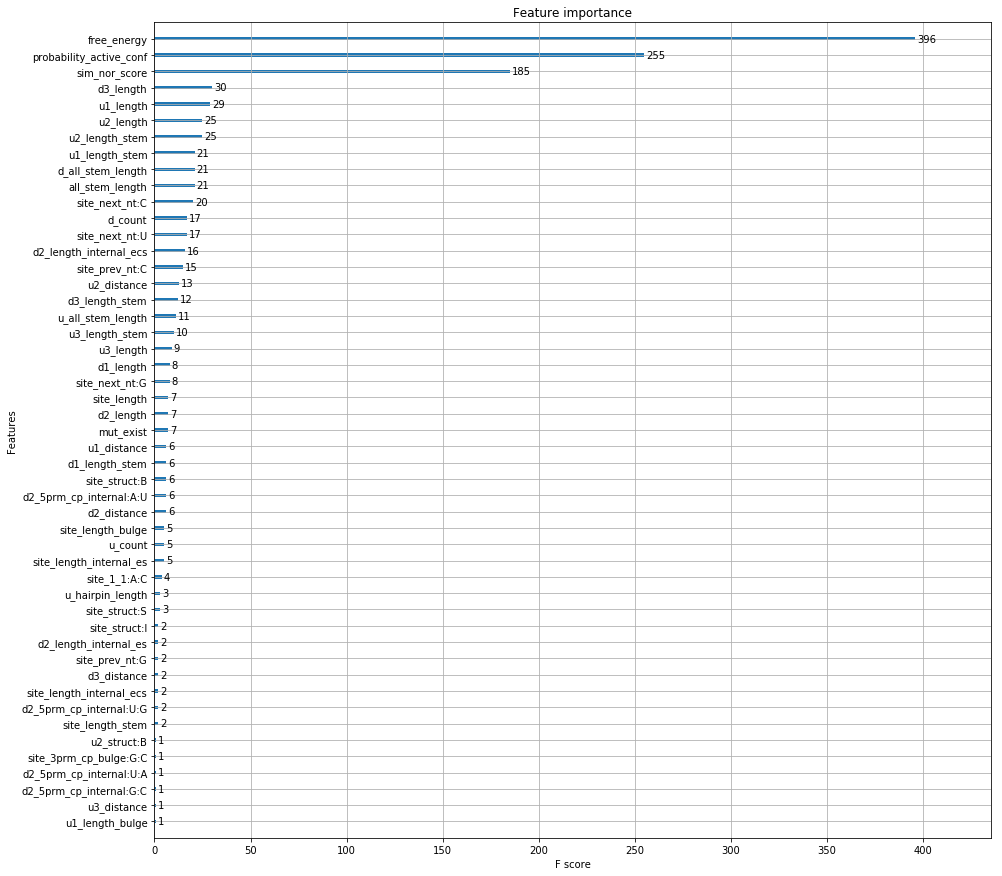

In [78]:
matplotlib.rcParams['figure.figsize'] = [15, 15]
xgboost.plot_importance(bst)

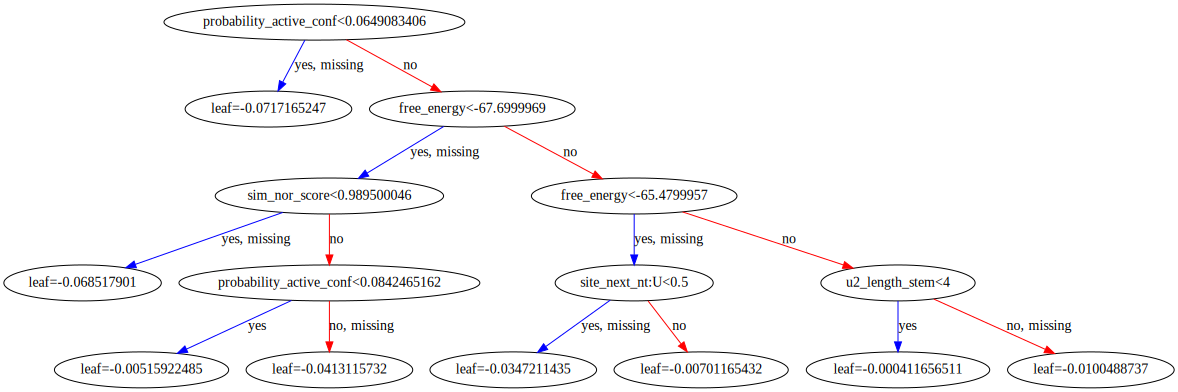

In [79]:
xgboost.to_graphviz(bst, num_trees=2)


In [80]:
# explain the model's predictions using SHAP values
explainer = shap.TreeExplainer(bst)
shap_values = explainer.shap_values(test_X)
shap_values.shape

(98, 81)

In [81]:
test_y=pd.DataFrame(test_y)
max_index=test_y.index[test_y['editing_value'] == max(test_y['editing_value'])]
max_row=test_y.index.get_loc(max_index[0])
# visualize prediction for isoform with the highest editing level 
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[max_row,:], test_X.iloc[max_row,:])

In [82]:
# visualize prediction for isoform with the lowest editing level 
shap.initjs()
min_index=test_y.index[test_y['editing_value'] == min(test_y['editing_value'])]
min_row=test_y.index.get_loc(min_index[0])
shap.force_plot(explainer.expected_value, shap_values[min_row,:], test_X.iloc[min_row,:])

In [83]:
# visualize the training set predictions
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values,train_X)

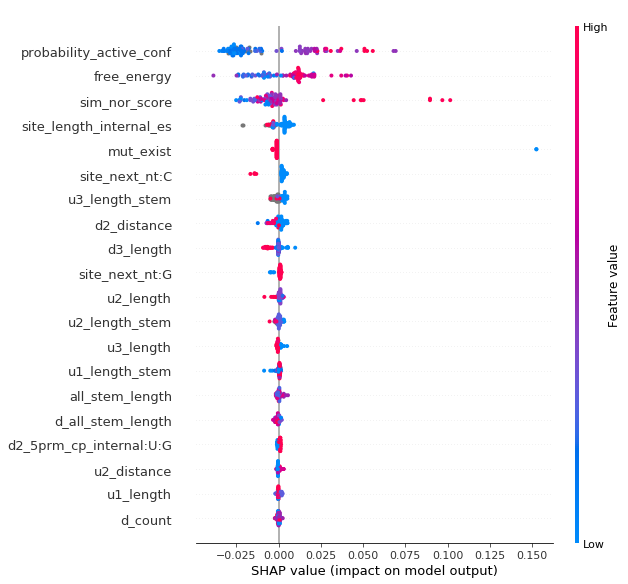

In [84]:
# summarize the effect of all the features 
shap.summary_plot(shap_values, test_X)


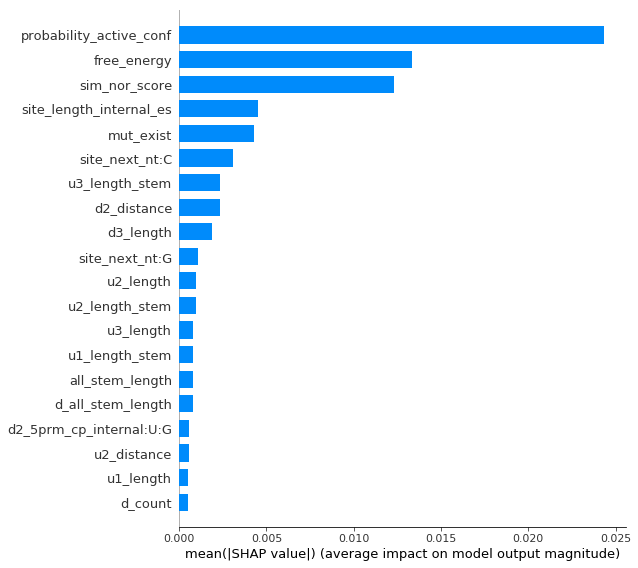

In [85]:
# We can also just take the mean absolute value of the SHAP values for each feature 
# to get a standard bar plot (produces stacked bars for multi-class outputs):
shap.summary_plot(shap_values, test_X, plot_type="bar")

In [86]:
## Compute pairwise interaction values from TreeShap
shap_interaction_values=explainer.shap_interaction_values(test_X)
shap_interaction_values.shape

(98, 81, 81)

In [87]:
##Average interaction values across the datapoints in the test set 
mean_interaction_values=np.mean(shap_interaction_values,axis=0)

In [88]:
Index=test_X.columns
Cols=test_X.columns
mean_interaction_values_df = pd.DataFrame(mean_interaction_values, index=Index, columns=Cols)

In [89]:
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
configure_plotly_browser_state()

trace = Heatmap(z=mean_interaction_values_df.values,
                   x=Cols,
                   y=Index)
iplot([trace],show_link=False)
